## Laboratorium 3 - Regresja logistyczna

In [89]:
import numpy as np
import math
import matplotlib.pyplot as plt
import csv

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [90]:
def h_fun(X, theta):
    z = theta.T @ X
    h = 1.0 / (1.0 + np.exp(-z))
    return h

def calculate_cost(X, y, theta):
    h = h_fun(X, theta)
    y_1 = -y * np.log(h)
    y_0 = -(1 - y) * np.log(1 - h)
    return np.sum(y_1 + y_0) / X.shape[1]

def gradient_descent(X, y, theta, alpha, eps, max_iters=100000):
    m = X.shape[1]
    cost = calculate_cost(X, y, theta)

    for i in range(max_iters):
        h_y_diff = h_fun(X, theta) - y
        gradient = (X @ h_y_diff.T) / m  # Gradient, używamy np.dot dla macierzy
        theta = theta - alpha * gradient  # Aktualizacja theta

        # if i % 100 == 0:  # wydrukuj co 100 iterację
        #     print(f"Iteration {i}: cost = {cost}, theta = {theta.T}")

        previous_cost, cost = cost, calculate_cost(X, y, theta)
        if previous_cost - cost < eps:
            break

    return theta

### Zadanie 1

In [91]:
# Dane wejściowe
X = np.array([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
              [0.3, 0.8, 1.7, 2.4, 2.9, 3.1, 4.5, 6.1]])
y = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]])

# Inicjalizacja parametrów
theta = np.zeros((X.shape[0], 1))
eps = 1e-5  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 1

# Optymalizacja
theta = gradient_descent(X, y, theta, alpha, eps)

# Wyświetlenie wyników
print("Optymalne współczynniki theta:", theta)

Optymalne współczynniki theta: [[-20.86924647]
 [  7.95532127]]


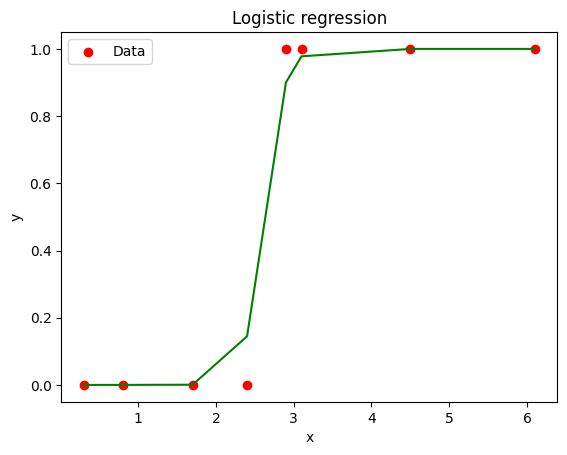

In [92]:
# Wykres
plt.scatter(X[1],y, label='Data', color='red')
plt.plot(X[1], h_fun(X,theta).flatten(), 'green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Logistic regression')
plt.legend()
plt.show()

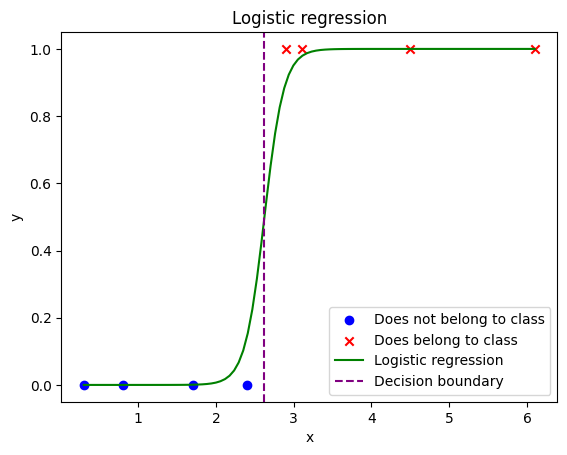

Optymalne współczynniki theta: [[-20.86924647]
 [  7.95532127]]


In [93]:
# Tworzenie zakresu x
x_range = np.linspace(min(X[1]), max(X[1]), 100)
X_plot = np.vstack((np.ones_like(x_range), x_range))

# Predykcja wartości h(x)
y_pred = h_fun(X_plot, theta)

# Tworzenie wykresu
plt.scatter(X[1, y[0] == 0], y[0, y[0] == 0], color='blue', label='Does not belong to class')
plt.scatter(X[1, y[0] == 1], y[0, y[0] == 1], color='red', marker='x', label='Does belong to class')
plt.plot(x_range, y_pred.flatten(), label="Logistic regression", color="green")

# Granica decyzyjna
decision_boundary_x = -theta[0, 0] / theta[1, 0]
plt.axvline(decision_boundary_x, color="purple", linestyle="--", label="Decision boundary")

# Etykiety i legenda
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Logistic regression")
plt.show()

# Wyświetlenie wyników
print("Optymalne współczynniki theta:", theta)

### Zadanie 2

In [94]:
with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x = data[:, :2].T
    X = np.concatenate([np.ones([1, x.shape[1]]), x])
 
print(f'{X.shape=}')
print(f'{y.shape=}')

X.shape=(3, 100)
y.shape=(1, 100)


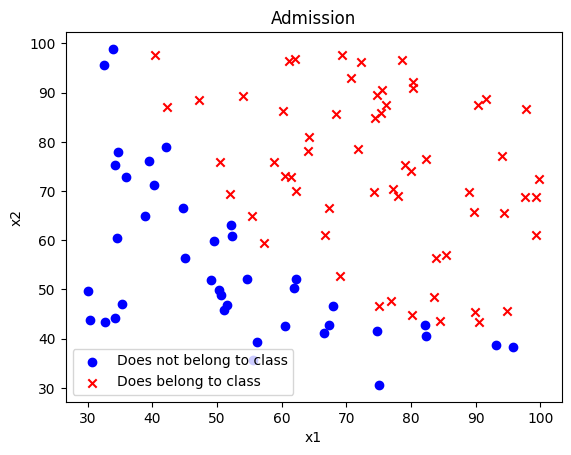

In [95]:
# Tworzenie wykresu
plt.scatter(X[1, y[0] == 0], X[2, y[0] == 0], color='blue', label='Does not belong to class')
plt.scatter(X[1, y[0] == 1], X[2, y[0] == 1], color='red', marker='x', label='Does belong to class')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Admission')
plt.legend()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_13740\117351622.py:9: RuntimeWarning: divide by zero encountered in log
  y_0 = -(1 - y) * np.log(1 - h)
C:\Users\User\AppData\Local\Temp\ipykernel_13740\117351622.py:9: RuntimeWarning: invalid value encountered in multiply
  y_0 = -(1 - y) * np.log(1 - h)


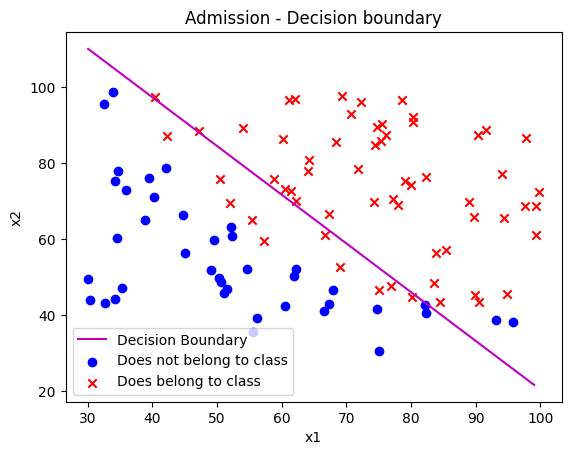

In [96]:
theta = np.zeros((X.shape[0], 1))
eps = 1e-10  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 0.022
theta = gradient_descent(X, y, theta, alpha, eps)

x1_db = np.arange(X[1, :].min(), X[1, :].max(), 1)
x2_db = (-theta[0, 0] - theta[1, 0] * x1_db) / theta[2, 0]
plt.plot(x1_db, x2_db, '-m', label='Decision Boundary')

plt.scatter(X[1, y[0] == 0], X[2, y[0] == 0], color='blue', label='Does not belong to class')
plt.scatter(X[1, y[0] == 1], X[2, y[0] == 1], color='red', marker='x', label='Does belong to class')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Admission - Decision boundary')
plt.legend()
plt.show()

In [97]:
print("Optymalne współczynniki theta:", theta)

Optymalne współczynniki theta: [[-65.92181658]
 [  0.56858077]
 [  0.44360557]]


### Zadanie 3

In [98]:
with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x1 = data[:, :1].T
    x2 = data[:, 1:2].T
    X = np.concatenate([np.ones([1, x1.shape[1]]), x1, x2, x1**2])

print(f'{X.shape=}')
print(f'{y.shape=}')

X_max = X.max(axis=1)
X_max.shape = [X_max.shape[0], 1]
X_min = X.min(axis=1)
X_min[0] = 0
X_min.shape = [X_min.shape[0], 1]
X = (X - X_min) / (X_max - X_min)

X.shape=(4, 100)
y.shape=(1, 100)


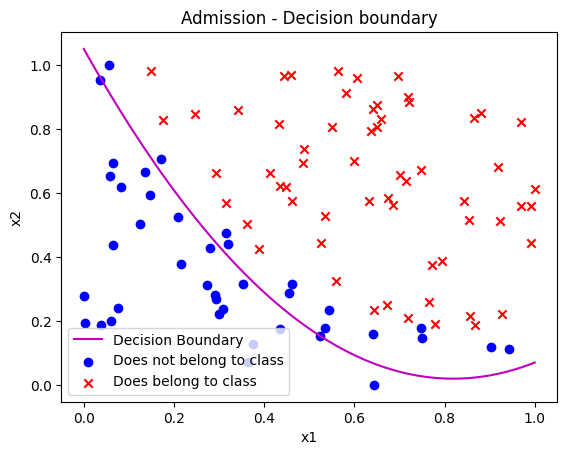

In [99]:
theta = np.zeros((X.shape[0], 1))
eps = 1e-5  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 5.8
theta = gradient_descent(X, y, theta, alpha, eps)

x1_db = np.linspace(X[1, :].min(), X[1, :].max(), 100) 
x2_db = (-theta[0, 0] - theta[1, 0] * x1_db - theta[3, 0] * x1_db**2) / theta[2, 0]

plt.plot(x1_db, x2_db, '-m', label='Decision Boundary')

plt.scatter(X[1, y[0] == 0], X[2, y[0] == 0], color='blue', label='Does not belong to class')
plt.scatter(X[1, y[0] == 1], X[2, y[0] == 1], color='red', marker='x', label='Does belong to class')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Admission - Decision boundary')
plt.legend()
plt.show()

In [100]:
print("Optymalne współczynniki theta:", theta)

Optymalne współczynniki theta: [[-16.17530354]
 [ 38.77092031]
 [ 15.39488392]
 [-23.67336217]]


### Zadanie 4

In [101]:
data = datasets.load_digits()
y = data['target']
x = data['data']
print(f'{x.shape=}')
print(f'{y.shape=}')

x.shape=(1797, 64)
y.shape=(1797,)


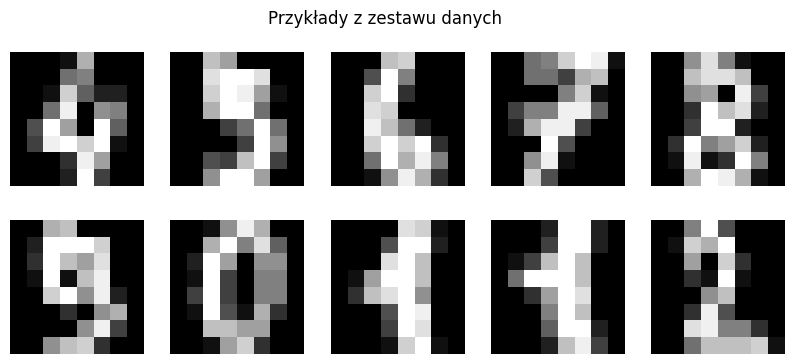

In [102]:
# Wybrane indeksy
selected_indices = [4, 5, 6, 7, 8, 9, 10, 11, 21, 22]

fig, axs = plt.subplots(2, 5, figsize=(10, 4))
plt.suptitle('Przykłady z zestawu danych')

for i, ax in enumerate(axs.flat):
    ex = x[selected_indices[i], :]
    ex = ex.reshape(8, 8)
    ax.imshow(ex, cmap='gray')
    ax.axis('off')

plt.show()

In [103]:
x, x_test, y, y_test = train_test_split(x, y, random_state=1234)

# Normalizacja danych
x_scale = 16.0  # Maksymalna wartość piksela
x = x / x_scale
x_test = x_test / x_scale

# Parametry
no_of_cls = 10
m, n = x.shape
eps = 1e-5
alpha = 1e-1  # Współczynnik uczenia

# Funkcja kosztu dla regresji logistycznej
def calculate_cost(X, y, theta):
    m = y.shape[1]
    h = 1.0 / (1.0 + np.exp(-theta.T @ X))
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def my_confusion_matrix(y_true, y_pred):
  n = len(np.unique(y_true))
  cm = np.zeros((n, n))
  for i in range(n):
    for j in range(n):
      cm[i, j] = np.sum((y_true == i) & (y_pred == j))
  return cm

# Trenowanie modeli
theta = []  # Lista na wagi modeli
for cls_id in range(no_of_cls):
    print(f'Trenowanie modelu dla cyfry {cls_id}')
    y_cls = (y == cls_id).astype(np.int8).reshape(1, m)  # Klasyfikacja binarna
    X_cls = np.concatenate([np.ones((1, m)), x.T])  # Dodanie wiersza jedynek
    theta_cls = np.zeros((n + 1, 1))
    
    prev_cost = calculate_cost(X_cls, y_cls, theta_cls)
    while True:
        h = 1.0 / (1.0 + np.exp(-theta_cls.T @ X_cls))
        gradient = (1/m) * X_cls @ (h - y_cls).T
        theta_cls -= alpha * gradient
        
        current_cost = calculate_cost(X_cls, y_cls, theta_cls)
        if math.fabs(prev_cost - current_cost) < eps:
            break
        prev_cost = current_cost
    print(f'Koszt dla klasy {cls_id}: {current_cost}.')
    theta.append(theta_cls)

# Ewaluacja modeli
predictions = []
for example in x_test:
    probabs = np.zeros(no_of_cls)
    X_example = np.concatenate([[1], example]).reshape(-1, 1)
    for cls_id, theta_cls in enumerate(theta):
        probabs[cls_id] = 1.0 / (1.0 + np.exp(-theta_cls.T @ X_example))
    pred = np.argmax(probabs)
    predictions.append(pred)
predictions = np.array(predictions)

# Macierz konfuzji
table = my_confusion_matrix(y_test, predictions)
print("Macierz konfuzji:")
print(table)

Trenowanie modelu dla cyfry 0
Koszt dla klasy 0: 0.024743055732746197.
Trenowanie modelu dla cyfry 1
Koszt dla klasy 1: 0.08141486444730639.
Trenowanie modelu dla cyfry 2
Koszt dla klasy 2: 0.036362500141264006.
Trenowanie modelu dla cyfry 3
Koszt dla klasy 3: 0.0648788187618853.
Trenowanie modelu dla cyfry 4
Koszt dla klasy 4: 0.033733745397119375.
Trenowanie modelu dla cyfry 5
Koszt dla klasy 5: 0.045002436884098405.
Trenowanie modelu dla cyfry 6
Koszt dla klasy 6: 0.03576048991905945.
Trenowanie modelu dla cyfry 7
Koszt dla klasy 7: 0.039499032809192605.
Trenowanie modelu dla cyfry 8
Koszt dla klasy 8: 0.11012402472660782.
Trenowanie modelu dla cyfry 9
Koszt dla klasy 9: 0.07943114602339717.
Macierz konfuzji:
[[37.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 44.  0.  0.  0.  0.  1.  0.  0.  2.]
 [ 0.  1. 47.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0. 43.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0. 48.  0.  0.  2.  1.  0.]
 [ 0.  0.  0.  0.  1. 46.  1.  0.  0.  1.]
 [ 0.  1.  0.  0.  0

C:\Users\User\AppData\Local\Temp\ipykernel_13740\305270841.py:56: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  probabs[cls_id] = 1.0 / (1.0 + np.exp(-theta_cls.T @ X_example))


In [104]:
def report(conf_matrix):
  n = conf_matrix.shape[0]
  print(" cls |  se  |  pp ")
  print(" --- | ---- | ----")
  for i in range(n):
    precision = conf_matrix[i, i] / np.sum(conf_matrix[:, i])      # precision = TP / (TP + FP)
    recall = conf_matrix[i, i] / np.sum(conf_matrix[i, :])         # recall = TP / (TP + FN)
    print(f"  {i}. | {recall:.2f} | {precision:.2f} ")
  return 

report(table)

 cls |  se  |  pp 
 --- | ---- | ----
  0. | 1.00 | 0.97 
  1. | 0.94 | 0.90 
  2. | 0.96 | 0.98 
  3. | 0.98 | 1.00 
  4. | 0.92 | 0.98 
  5. | 0.94 | 0.98 
  6. | 0.96 | 0.93 
  7. | 1.00 | 0.89 
  8. | 0.86 | 0.88 
  9. | 0.89 | 0.91 


In [105]:
# Macierz konfuzji
table = confusion_matrix(y_test, predictions)
print("Macierz konfuzji:")
print(table)

# Raport klasyfikacji
report = classification_report(y_test, predictions, digits=2, output_dict=True)
print("\nRaport klasyfikacji:")
print(classification_report(y_test, predictions, digits=2))

Macierz konfuzji:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  0  0  0  1  0  0  2]
 [ 0  1 47  0  0  0  0  1  0  0]
 [ 0  0  0 43  0  1  0  0  0  0]
 [ 1  0  0  0 48  0  0  2  1  0]
 [ 0  0  0  0  1 46  1  0  0  1]
 [ 0  1  0  0  0  0 43  0  1  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  3  1  0  0  0  1  0 37  1]
 [ 0  0  0  0  0  0  0  2  3 39]]

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.90      0.94      0.92        47
           2       0.98      0.96      0.97        49
           3       1.00      0.98      0.99        44
           4       0.98      0.92      0.95        52
           5       0.98      0.94      0.96        49
           6       0.93      0.96      0.95        45
           7       0.89      1.00      0.94        40
           8       0.88      0.86      0.87        43
           9       0.91      0.89      0.90        44

    accuracy                     